# Laboratorio 5
#### Sebastian Aristondo 20880
#### Daniel Gonzalez 20293

## Ejercicio 1

In [345]:
import random
from PIL import Image
from IPython.display import display, Image as IPImage
import matplotlib.pyplot as plt

In [346]:
HEIGHT = 100
WIDTH = 100

In [347]:
class Obstaculos(object):
    def __init__(self,x, y):
        self.y = y
        self.x = x
        

In [348]:
class Cazador(object):
    def __init__(self, x, y,obstaculos=None) -> None:
        self.x = x
        self.y = y
        self.rango = 15
        self.presa = None
        self.obstaculos = obstaculos
        self.contador_persecucion = 0
        self.color = "yellow"

        
    def evadir_obstaculos(self, pos):
        x,y = pos
        if x < self.x or x > self.x:
            if random.random() < 0.5:
                y += 1
            else:
                y -= 1
                
        if y < self.y or y > self.y:
            if random.random() < 0.5:
                x += 1
            else:
                x -= 1
        
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2
            
        return (x,y)       
        
    def colision(self,x,y):
        for obj in self.obstaculos:
            if obj.x == x and obj.y == y and type(obj) != Presa:
                return True
        return False
            
    
    def hunt(self, presa):
        
        self.contador_persecucion += 1
        
        if self.contador_persecucion == 25:
            self.contador_persecucion = 0
            self.presa = None
            return
        
        x =  self.x
        y = self.y
        if presa.x < self.x:
            x -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        elif presa.x > self.x:
            x += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        if presa.y < self.y:
            y -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        elif presa.y > self.y:
            y += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
                
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2
            
            
        self.x = x
        self.y = y
        
        if self.presa is not None:
            if self.x == presa.x and self.y == presa.y:
                presa.alive = False
                self.presa = None
         
        
        if self.presa is not None:   
            x_status = False
            y_status = False
            RANGO = 2
            if self.x + RANGO >= presa.x and self.x - RANGO <= presa.x:
                x_status = True
            if self.y + RANGO >= presa.y and self.y - RANGO <= presa.y:
                y_status = True

            if x_status and y_status:
                if random.random() < 0.5:
                    self.presa.alive = False
                    self.x = self.presa.x
                    self.y = self.presa.y
                    self.presa = None
                
    
    def random_move(self):
        x = self.x
        y = self.y
        if random.random() < 0.5:
            x += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        else:
            x -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        if random.random() < 0.5:
            y += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        else:
            y -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2
                
        self.x = x
        self.y = y
        
    def mover(self):
        
        if self.presa is not None:
            if self.presa.alive == False:
                self.presa = None
        
        if self.presa != None:
            self.hunt(self.presa)
        else:
            self.random_move()     
            
    def in_sight(self,presa):
        
        if self.presa is not None:
            return
        
        x_presa = presa.x
        y_presa = presa.y
        
        y_status = False
        x_status = False
        
        if self.x + self.rango >= x_presa and self.x - self.rango <= x_presa:
            x_status = True
        if self.y + self.rango >= y_presa and self.y - self.rango <= y_presa:
            y_status = True
            
        visible = x_status and y_status and presa.alive
        
        self.presa = presa if visible else None
        

In [349]:
class Emboscador(object):
    def __init__(self, x, y,obstaculos=None) -> None:
        self.x = x
        self.y = y
        self.rango = 10
        self.presa = None
        self.obstaculos = obstaculos
        self.contador_persecucion = 0
        self.color = "yellow"

        
    def evadir_obstaculos(self, pos):
        x,y = pos
        if x < self.x or x > self.x:
            if random.random() < 0.5:
                y += 1
            else:
                y -= 1
                
        if y < self.y or y > self.y:
            if random.random() < 0.5:
                x += 1
            else:
                x -= 1
        
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2
            
        return (x,y)       
        
    def colision(self,x,y):
        for obj in self.obstaculos:
            if obj.x == x and obj.y == y and type(obj) != Presa:
                return True
        return False
            
    
    def hunt(self, presa):
        
        
        x =  self.x
        y = self.y
        if presa.x < self.x:
            x -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        elif presa.x > self.x:
            x += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        if presa.y < self.y:
            y -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        elif presa.y > self.y:
            y += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
                
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2
            
            
        self.x = x
        self.y = y
        
        if self.presa is not None:
            if self.x == presa.x and self.y == presa.y:
                presa.alive = False
                self.presa = None
         
        
        if self.presa is not None:   
            x_status = False
            y_status = False
            RANGO = 2
            if self.x + RANGO >= presa.x and self.x - RANGO <= presa.x:
                x_status = True
            if self.y + RANGO >= presa.y and self.y - RANGO <= presa.y:
                y_status = True

            if x_status and y_status:
                if random.random() < 0.2:
                    self.presa.alive = False
                    self.x = self.presa.x
                    self.y = self.presa.y
                    self.presa = None
                   
    def mover(self):
        
        if self.presa is not None:
            if self.presa.alive == False:
                self.presa = None
        
        if self.presa != None:
            self.hunt(self.presa)
                 
            
    def in_sight(self,presa):
        
        if self.presa is not None:
            return
        
        x_presa = presa.x
        y_presa = presa.y
        
        y_status = False
        x_status = False
        
        if self.x + self.rango >= x_presa and self.x - self.rango <= x_presa:
            x_status = True
        if self.y + self.rango >= y_presa and self.y - self.rango <= y_presa:
            y_status = True
            
        visible = x_status and y_status and presa.alive
        
        self.presa = presa if visible else None
        

In [350]:
class Presa(object):
    def __init__(self, x, y,obstaculos=None):
        self.x = x
        self.y = y
        self.rango = 6
        self.obstaculos = obstaculos
        self.contador_persecucion = 0
        self.color = "yellow"
        self.alive = True
        
        self.cazador = None

        
    def evadir_obstaculos(self, pos):
        x,y = pos
        if x < self.x or x > self.x:
            if random.random() < 0.5:
                y += 1
            else:
                y -= 1
                
        if y < self.y or y > self.y:
            if random.random() < 0.5:
                x += 1
            else:
                x -= 1
        
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2
            
        return (x,y)       
        
    def colision(self,x,y):
        for obj in self.obstaculos:
            if obj.x == x and obj.y == y:
                return True
        return False
            
    
    def run(self, cazador,max_depth=0):
        if max_depth >2:
            return
        
        self.contador_persecucion += 1
        
        if self.contador_persecucion == 3:
            self.contador_persecucion = 0
            self.cazador = None
            return
        
        x =  self.x
        y = self.y
        if cazador.x > self.x:
            x -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        elif cazador.x < self.x:
            x += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        if cazador.y > self.y:
            y -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        elif cazador.y < self.y:
            y += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
                
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2            
            
        self.x = x
        self.y = y
    
    def random_move(self):
        x = self.x
        y = self.y
        if random.random() < 0.5:
            x += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        else:
            x -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        if random.random() < 0.5:
            y += 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        else:
            y -= 1
            if self.colision(x,y):
                x,y = self.evadir_obstaculos((x,y))
        
        if x<0:
            x += 2
        if x>WIDTH:
            x -= 2
        if y<0:
            y += 2
        if y>HEIGHT:
            y -= 2
                
        self.x = x
        self.y = y
        
    def mover(self):
        
        if self.cazador != None:
            self.run(self.cazador)
        else:
            self.random_move()     
            
    def in_sight(self,cazador):

        
        x_presa = cazador.x
        y_presa = cazador.y
        
        y_status = False
        x_status = False
        
        if self.x + self.rango >= x_presa and self.x - self.rango <= x_presa:
            x_status = True
        if self.y + self.rango >= y_presa and self.y - self.rango <= y_presa:
            y_status = True
            
        visible = x_status and y_status
        
        self.cazador = cazador if visible else None
        

In [351]:
def random_position():
    x = random.randint(0,WIDTH)
    y = random.randint(0,HEIGHT)
    return (x,y)

def create_n_elements(cantidad):
    temp_list = []
    i = 0
    while i < cantidad:
        x,y = random_position()
        if (x,y) not in temp_list:
            temp_list.append((x,y))
            i+=1
    return temp_list
    
    

width = 100
height = 100
num_obstaculos = 10
num_predadores = 10
num_presas = 25

        
all_objects = []
Cazadores = []
Presas = []
Piedras = []
all_positions = create_n_elements(num_obstaculos + num_predadores + num_presas)

# all_positions = [(0,0),(50,50),(47,50),(42,50)]
# num_obstaculos =1
# num_predadores = 1
# num_presas = 2

for x,y in all_positions:
    if all_positions.index((x,y)) < num_obstaculos:
        obj_created = Obstaculos(x,y)
        all_objects.append(obj_created)
        Piedras.append(obj_created)
    elif all_positions.index((x,y)) < num_obstaculos + num_predadores:
        obj_created = Cazador(x,y)
        all_objects.append(obj_created)
        Cazadores.append(obj_created)
    else:
        obj_created = Presa(x,y)
        all_objects.append(obj_created)
        Presas.append(obj_created)
        
for cazador in Cazadores:
    cazador.obstaculos = all_objects
for presa in Presas:
    presa.obstaculos = all_objects

Cazadores y Presas


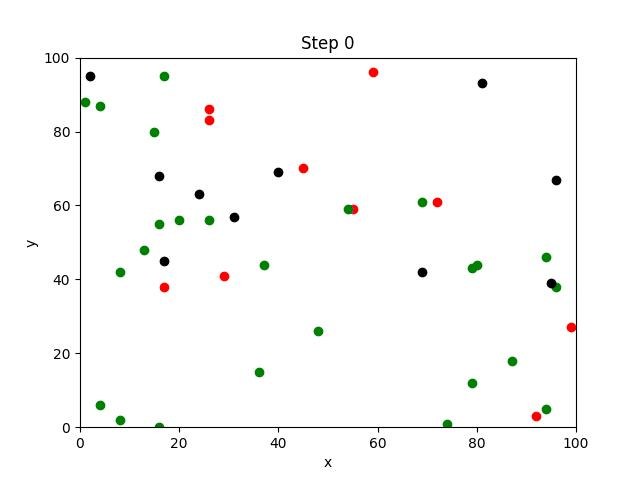

In [352]:
# Simular
list_images = []
num_steps = 100
for step in range(num_steps):
    
    x_obstaculos = []
    y_obstaculos = []
    x_cazador = []
    y_cazador = []
    x_presa = []
    y_presa = []
    x_muerto = []
    y_muerto = []
    for cazador in Cazadores:
        for buscar_presa in Presas:
            cazador.in_sight(buscar_presa)
        cazador.mover()
        x_cazador.append(cazador.x)
        y_cazador.append(cazador.y)
    
    for presa in Presas:
        for buscar_cazador in Cazadores:
            presa.in_sight(buscar_cazador)
            #if presa.cazador is not None:
            #    break
        
        if presa.alive == False:
            x_muerto.append(presa.x)
            y_muerto.append(presa.y)
        else:
            presa.mover()
            x_presa.append(presa.x)
            y_presa.append(presa.y)
        
        
        
    plt.plot(x_cazador, y_cazador, "ro")
    plt.plot(x_presa, y_presa, "go")
    plt.plot(x_muerto, y_muerto, "yo")
    for obj in Piedras:
        plt.plot(obj.x, obj.y, "ko")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Step "+str(step))
    plt.xlim(0, width)
    plt.ylim(0, height)
    name =  "Africa/step_"+str(step)+".jpg"
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)


images = [Image.open(path) for path in list_images]
print("Cazadores y Presas")
# Save the images as an animated GIF
gif_path = "Cazadores_Presas.gif"  # Specify the path for the GIF file
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=300)
display(IPImage(filename=gif_path))

En esta primera simulación estamos trabajando con Cazadores y Presas. Los cazadores se mueven de manera aleatoria hasta que una presa esta lo suficientemente cerca para comenzar a perseguirla. El Cazador tiene un limite de 25 pasos para cansarse y elegir a una nueva presa. Mientas que las presas tras detectar a un Cazador luego de 3 pasos se cansan y se sienten nuevamente "seguras". Los cazadores mataran a las presas si se encuentran en la misma casilla pero también si estan a una distancia de 2 casillas se realizara una probabilidad de 0.5 para matar a la presa.

### Preguntas
1. ¿Qué comportamientos puede observar en los depredadores?
    Podemos ver que la población de Presas se reduce rapidamente, los Cazadores tienen muchas presas juntos por lo que luego de matar a una presa se mueven a la siguiente y asi sucesivamente. En pocas ocaciones podemos ver que un Cazador se canse y cambie de presa
2. ¿Cómo mejoraría este modelo?
    Podemos ver que los Cazadores luego de cazar todos las presas de su zona se quedan movimiento en circulos, esto se debe a la generación de números aleatorios. Tal vez se podria cambiar a utilizar alguna distribución para que si se paseen por todo el mapa y no se queden aislados en una zona

In [353]:
def random_position():
    x = random.randint(0,WIDTH)
    y = random.randint(0,HEIGHT)
    return (x,y)

def create_n_elements(cantidad):
    temp_list = []
    i = 0
    while i < cantidad:
        x,y = random_position()
        if (x,y) not in temp_list:
            temp_list.append((x,y))
            i+=1
    return temp_list
    
    

width = 100
height = 100
num_obstaculos = 10
num_predadores = 5
num_presas = 25

        
all_objects = []
Cazadores = []
Presas = []
Piedras = []
all_positions = create_n_elements(num_obstaculos + num_predadores + num_presas)


for x,y in all_positions:
    if all_positions.index((x,y)) < num_obstaculos:
        obj_created = Obstaculos(x,y)
        all_objects.append(obj_created)
        Piedras.append(obj_created)
    elif all_positions.index((x,y)) < num_obstaculos + num_predadores:
        obj_created = Emboscador(x,y)
        all_objects.append(obj_created)
        Cazadores.append(obj_created)
    else:
        obj_created = Presa(x,y)
        all_objects.append(obj_created)
        Presas.append(obj_created)
        
for cazador in Cazadores:
    cazador.obstaculos = all_objects
for presa in Presas:
    presa.obstaculos = all_objects

Emboscadores y Presas


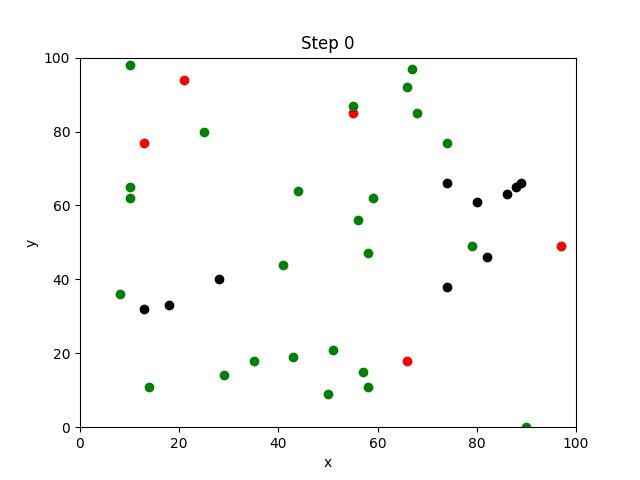

In [354]:
# Simular
list_images = []
num_steps = 100
for step in range(num_steps):
    
    x_obstaculos = []
    y_obstaculos = []
    x_cazador = []
    y_cazador = []
    x_presa = []
    y_presa = []
    x_muerto = []
    y_muerto = []
    for cazador in Cazadores:
        for buscar_presa in Presas:
            cazador.in_sight(buscar_presa)
        cazador.mover()
        x_cazador.append(cazador.x)
        y_cazador.append(cazador.y)
    
    for presa in Presas:
        for buscar_cazador in Cazadores:
            presa.in_sight(buscar_cazador)
            #if presa.cazador is not None:
            #    break
        
        if presa.alive == False:
            x_muerto.append(presa.x)
            y_muerto.append(presa.y)
        else:
            presa.mover()
            x_presa.append(presa.x)
            y_presa.append(presa.y)
        
        
        
    plt.plot(x_cazador, y_cazador, "ro")
    plt.plot(x_presa, y_presa, "go")
    plt.plot(x_muerto, y_muerto, "yo")
    for obj in Piedras:
        plt.plot(obj.x, obj.y, "ko")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Step "+str(step))
    plt.xlim(0, width)
    plt.ylim(0, height)
    name =  "Africa2/step_"+str(step)+".jpg"
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)


images = [Image.open(path) for path in list_images]
print("Emboscadores y Presas")
# Save the images as an animated GIF
gif_path = "Emboscadores_Presas.gif"  # Specify the path for the GIF file
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=300)
display(IPImage(filename=gif_path))

Para esta nueva simulación creamos un nuevo carnivoro llamado Cazador el cual no persigue a las presas si no que se mueve de manera aleatoria hasta que una presa este lo suficientemente cerca para comenzar a perseguirla. El Cazador una vez tiene una presa no la deja de perseguir hasta que lo mate. Al igual que el Cazador tiene una probabilidad de 0.5 de matar a la presa si esta a una distancia de 2 casillas. La presa es la misma.

### Preguntas
1. ¿Qué comportamientos puede observar en los depredadores?
    Estos depredadores se quedan escondidos destrás de su ultima presa hasta que una nueva presa se encuentra dentro de su campo de emboscada. Luego de matar a una presa se quedan en el mismo lugar esperando a que una nueva presa se acerque. 

2. ¿Cómo mejoraría este modelo?
    Dar un limite de tiempo a que los emboscadores esten esperando en una ubicación, si este tiempo se pasa que se muevan a una nueva ubicación aleatoria. Esto para que no se queden en el mismo lugar esperando a que una presa se acerque cuando ya no hay presas cerca.